In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import skew
import seaborn as sns
import numpy as np
from datetime import datetime
import math

In [3]:
df = pd.read_csv("taxi_fare.csv")
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,1,2016-03-01 00:00:00,2016-03-01 00:07:55,1,-73.976746,40.765152,1,N,-74.004265,40.746128,1,9.0,0.5,0.5,2.05,0.00,0.3,12.35
1,1,2016-03-01 00:00:00,2016-03-01 00:11:06,1,-73.983482,40.767925,1,N,-74.005943,40.733166,1,11.0,0.5,0.5,3.05,0.00,0.3,15.35
2,2,2016-03-01 00:00:00,2016-03-01 00:31:06,2,-73.782021,40.644810,1,N,-73.974541,40.675770,1,54.5,0.5,0.5,8.00,0.00,0.3,63.80
3,2,2016-03-01 00:00:00,2016-03-01 00:00:00,3,-73.863419,40.769814,1,N,-73.969650,40.757767,1,31.5,0.0,0.5,3.78,5.54,0.3,41.62
4,2,2016-03-01 00:00:00,2016-03-01 00:00:00,5,-73.971741,40.792183,3,N,-74.177170,40.695053,1,98.0,0.0,0.0,0.00,15.50,0.3,113.80


In [4]:
df = df.drop("store_and_fwd_flag", axis=1)

df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,RatecodeID,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,1,2016-03-01 00:00:00,2016-03-01 00:07:55,1,-73.976746,40.765152,1,-74.004265,40.746128,1,9.0,0.5,0.5,2.05,0.00,0.3,12.35
1,1,2016-03-01 00:00:00,2016-03-01 00:11:06,1,-73.983482,40.767925,1,-74.005943,40.733166,1,11.0,0.5,0.5,3.05,0.00,0.3,15.35
2,2,2016-03-01 00:00:00,2016-03-01 00:31:06,2,-73.782021,40.644810,1,-73.974541,40.675770,1,54.5,0.5,0.5,8.00,0.00,0.3,63.80
3,2,2016-03-01 00:00:00,2016-03-01 00:00:00,3,-73.863419,40.769814,1,-73.969650,40.757767,1,31.5,0.0,0.5,3.78,5.54,0.3,41.62
4,2,2016-03-01 00:00:00,2016-03-01 00:00:00,5,-73.971741,40.792183,3,-74.177170,40.695053,1,98.0,0.0,0.0,0.00,15.50,0.3,113.80


UNDERSTAND THE DATA SET

In [5]:
df.shape

(212345, 17)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212345 entries, 0 to 212344
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               212345 non-null  int64  
 1   tpep_pickup_datetime   212345 non-null  object 
 2   tpep_dropoff_datetime  212345 non-null  object 
 3   passenger_count        212345 non-null  int64  
 4   pickup_longitude       212345 non-null  float64
 5   pickup_latitude        212345 non-null  float64
 6   RatecodeID             212345 non-null  int64  
 7   dropoff_longitude      212345 non-null  float64
 8   dropoff_latitude       212345 non-null  float64
 9   payment_type           212345 non-null  int64  
 10  fare_amount            212345 non-null  float64
 11  extra                  212345 non-null  float64
 12  mta_tax                212345 non-null  float64
 13  tip_amount             212345 non-null  float64
 14  tolls_amount           212345 non-nu

In [7]:
df.dtypes

VendorID                   int64
tpep_pickup_datetime      object
tpep_dropoff_datetime     object
passenger_count            int64
pickup_longitude         float64
pickup_latitude          float64
RatecodeID                 int64
dropoff_longitude        float64
dropoff_latitude         float64
payment_type               int64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
dtype: object

In [8]:
df.describe()

,VendorID,passenger_count,pickup_longitude,pickup_latitude,RatecodeID,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,212345.000000,212345.000000,212345.000000,212345.000000,212345.000000,212345.000000,212345.000000,212345.000000,212345.000000,212345.000000,212345.000000,212345.000000,212345.000000,212345.000000,212345.000000
mean,1.708338,1.766493,-73.112122,40.279405,1.034152,-73.144178,40.295648,1.324943,12.665588,0.048077,0.497662,1.809357,0.329049,0.299637,15.649355
std,0.454529,1.469647,7.936633,4.370714,0.494699,7.794599,4.293031,0.478255,10.875584,0.148103,0.037436,2.507419,2.028199,0.014094,13.592129
min,1.000000,0.000000,-121.933327,0.000000,1.000000,-121.933327,0.000000,1.000000,-52.000000,-0.500000,-0.500000,-2.700000,0.000000,-0.300000,-52.800000
25%,1.000000,1.000000,-73.990891,40.740292,1.000000,-73.990570,40.740089,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.300000
50%,2.000000,1.000000,-73.979469,40.755989,1.000000,-73.978691,40.755508,1.000000,9.500000,0.000000,0.500000,1.350000,0.000000,0.300000,11.620000
75%,2.000000,2.000000,-73.963295,40.770283,1.000000,-73.964645,40.767475,2.000000,14.500000,0.000000,0.500000,2.360000,0.000000,0.300000,17.160000
max,2.000000,6.000000,0.000000,42.786934,99.000000,0.000000,42.786934,4.000000,819.500000,4.500000,0.500000,218.950000,661.080000,0.300000,832.800000


In [9]:
df.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude', 'RatecodeID',
       'dropoff_longitude', 'dropoff_latitude', 'payment_type', 'fare_amount',
       'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
       'improvement_surcharge', 'total_amount'],
      dtype='object')

In [10]:
df.duplicated().sum()

np.int64(0)

In [11]:
df.isnull().sum()

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
pickup_longitude         0
pickup_latitude          0
RatecodeID               0
dropoff_longitude        0
dropoff_latitude         0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
dtype: int64

TO CHECK UNIQUE VALUES IN EACH COLUMNS

In [12]:
for col in df.columns:
    print(f"{col}:\n unique values:",df[col].nunique(), "\n", df[col].unique())
    print()

VendorID:
 unique values: 2 
 [1 2]

tpep_pickup_datetime:
 unique values: 61208 
 ['2016-03-01 00:00:00' '2016-03-01 00:00:01' '2016-03-01 00:00:02' ...
 '2016-03-01 12:15:36' '2016-03-01 12:15:37' '2016-03-01 12:15:38']

tpep_dropoff_datetime:
 unique values: 63607 
 ['2016-03-01 00:07:55' '2016-03-01 00:11:06' '2016-03-01 00:31:06' ...
 '2016-03-01 12:37:29' '2016-03-01 12:38:53' '2016-03-01 12:38:22']

passenger_count:
 unique values: 7 
 [1 2 3 5 6 4 0]

pickup_longitude:
 unique values: 14794 
 [-73.97674561 -73.98348236 -73.78202057 ... -73.82849884 -73.83630371
 -73.87155914]

pickup_latitude:
 unique values: 30504 
 [40.76515198 40.76792526 40.64480972 ... 40.72326279 40.79697418
 40.64451218]

RatecodeID:
 unique values: 7 
 [ 1  3  2  5  4  6 99]

dropoff_longitude:
 unique values: 18029 
 [-74.00426483 -74.0059433  -73.97454071 ... -74.01698303 -73.93318176
 -73.80863953]

dropoff_latitude:
 unique values: 34903 
 [40.74612808 40.73316574 40.67576981 ... 40.62379837 40.8038

DERIVED COLUMNS

In [13]:
def haversine(lon1, lat1, lon2, lat2):
    # convert decimal degrees to radians
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])
    
    # haversine formula
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arcsin(np.sqrt(a)) 
    r = 6371  # Radius of Earth in km
    return c * r

df['trip_distance'] = haversine(df['pickup_longitude'], df['pickup_latitude'],
                                df['dropoff_longitude'], df['dropoff_latitude'])


In [14]:
df['pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'], utc=True)
df['pickup_datetime'] = df['pickup_datetime'].dt.tz_convert('US/Eastern')

# Now create new columns
df['pickup_day'] = df['pickup_datetime'].dt.day_name()
df['is_weekend'] = df['pickup_datetime'].dt.dayofweek >= 5

df['am_pm'] = df['pickup_datetime'].dt.strftime('%p')  # AM or PM

df['hour'] = df['pickup_datetime'].dt.hour
df['is_night'] = df['hour'].apply(lambda x: 1 if (x >= 22 or x <= 5) else 0)

# Convert string to datetime
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'], utc=True)

# Convert to EDT timezone
df['pickup_datetime'] = df['pickup_datetime'].dt.tz_convert('US/Eastern')

df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,RatecodeID,dropoff_longitude,dropoff_latitude,payment_type,...,tolls_amount,improvement_surcharge,total_amount,trip_distance,pickup_datetime,pickup_day,is_weekend,am_pm,hour,is_night
0,1,2016-03-01 00:00:00,2016-03-01 00:07:55,1,-73.976746,40.765152,1,-74.004265,40.746128,1,...,0.00,0.3,12.35,3.138096,2016-02-29 19:00:00-05:00,Monday,False,PM,19,0
1,1,2016-03-01 00:00:00,2016-03-01 00:11:06,1,-73.983482,40.767925,1,-74.005943,40.733166,1,...,0.00,0.3,15.35,4.303331,2016-02-29 19:00:00-05:00,Monday,False,PM,19,0
2,2,2016-03-01 00:00:00,2016-03-01 00:31:06,2,-73.782021,40.644810,1,-73.974541,40.675770,1,...,0.00,0.3,63.80,16.600142,2016-02-29 19:00:00-05:00,Monday,False,PM,19,0
3,2,2016-03-01 00:00:00,2016-03-01 00:00:00,3,-73.863419,40.769814,1,-73.969650,40.757767,1,...,5.54,0.3,41.62,9.046547,2016-02-29 19:00:00-05:00,Monday,False,PM,19,0
4,2,2016-03-01 00:00:00,2016-03-01 00:00:00,5,-73.971741,40.792183,3,-74.177170,40.695053,1,...,15.50,0.3,113.80,20.400022,2016-02-29 19:00:00-05:00,Monday,False,PM,19,0


In [15]:
df.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude', 'RatecodeID',
       'dropoff_longitude', 'dropoff_latitude', 'payment_type', 'fare_amount',
       'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
       'improvement_surcharge', 'total_amount', 'trip_distance',
       'pickup_datetime', 'pickup_day', 'is_weekend', 'am_pm', 'hour',
       'is_night'],
      dtype='object')

In [16]:
numerical_cols = df.select_dtypes(exclude='object').columns
numerical_cols

Index(['VendorID', 'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'RatecodeID', 'dropoff_longitude', 'dropoff_latitude', 'payment_type',
       'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
       'improvement_surcharge', 'total_amount', 'trip_distance',
       'pickup_datetime', 'is_weekend', 'hour', 'is_night'],
      dtype='object')

CHECKING THE OUTLIERS

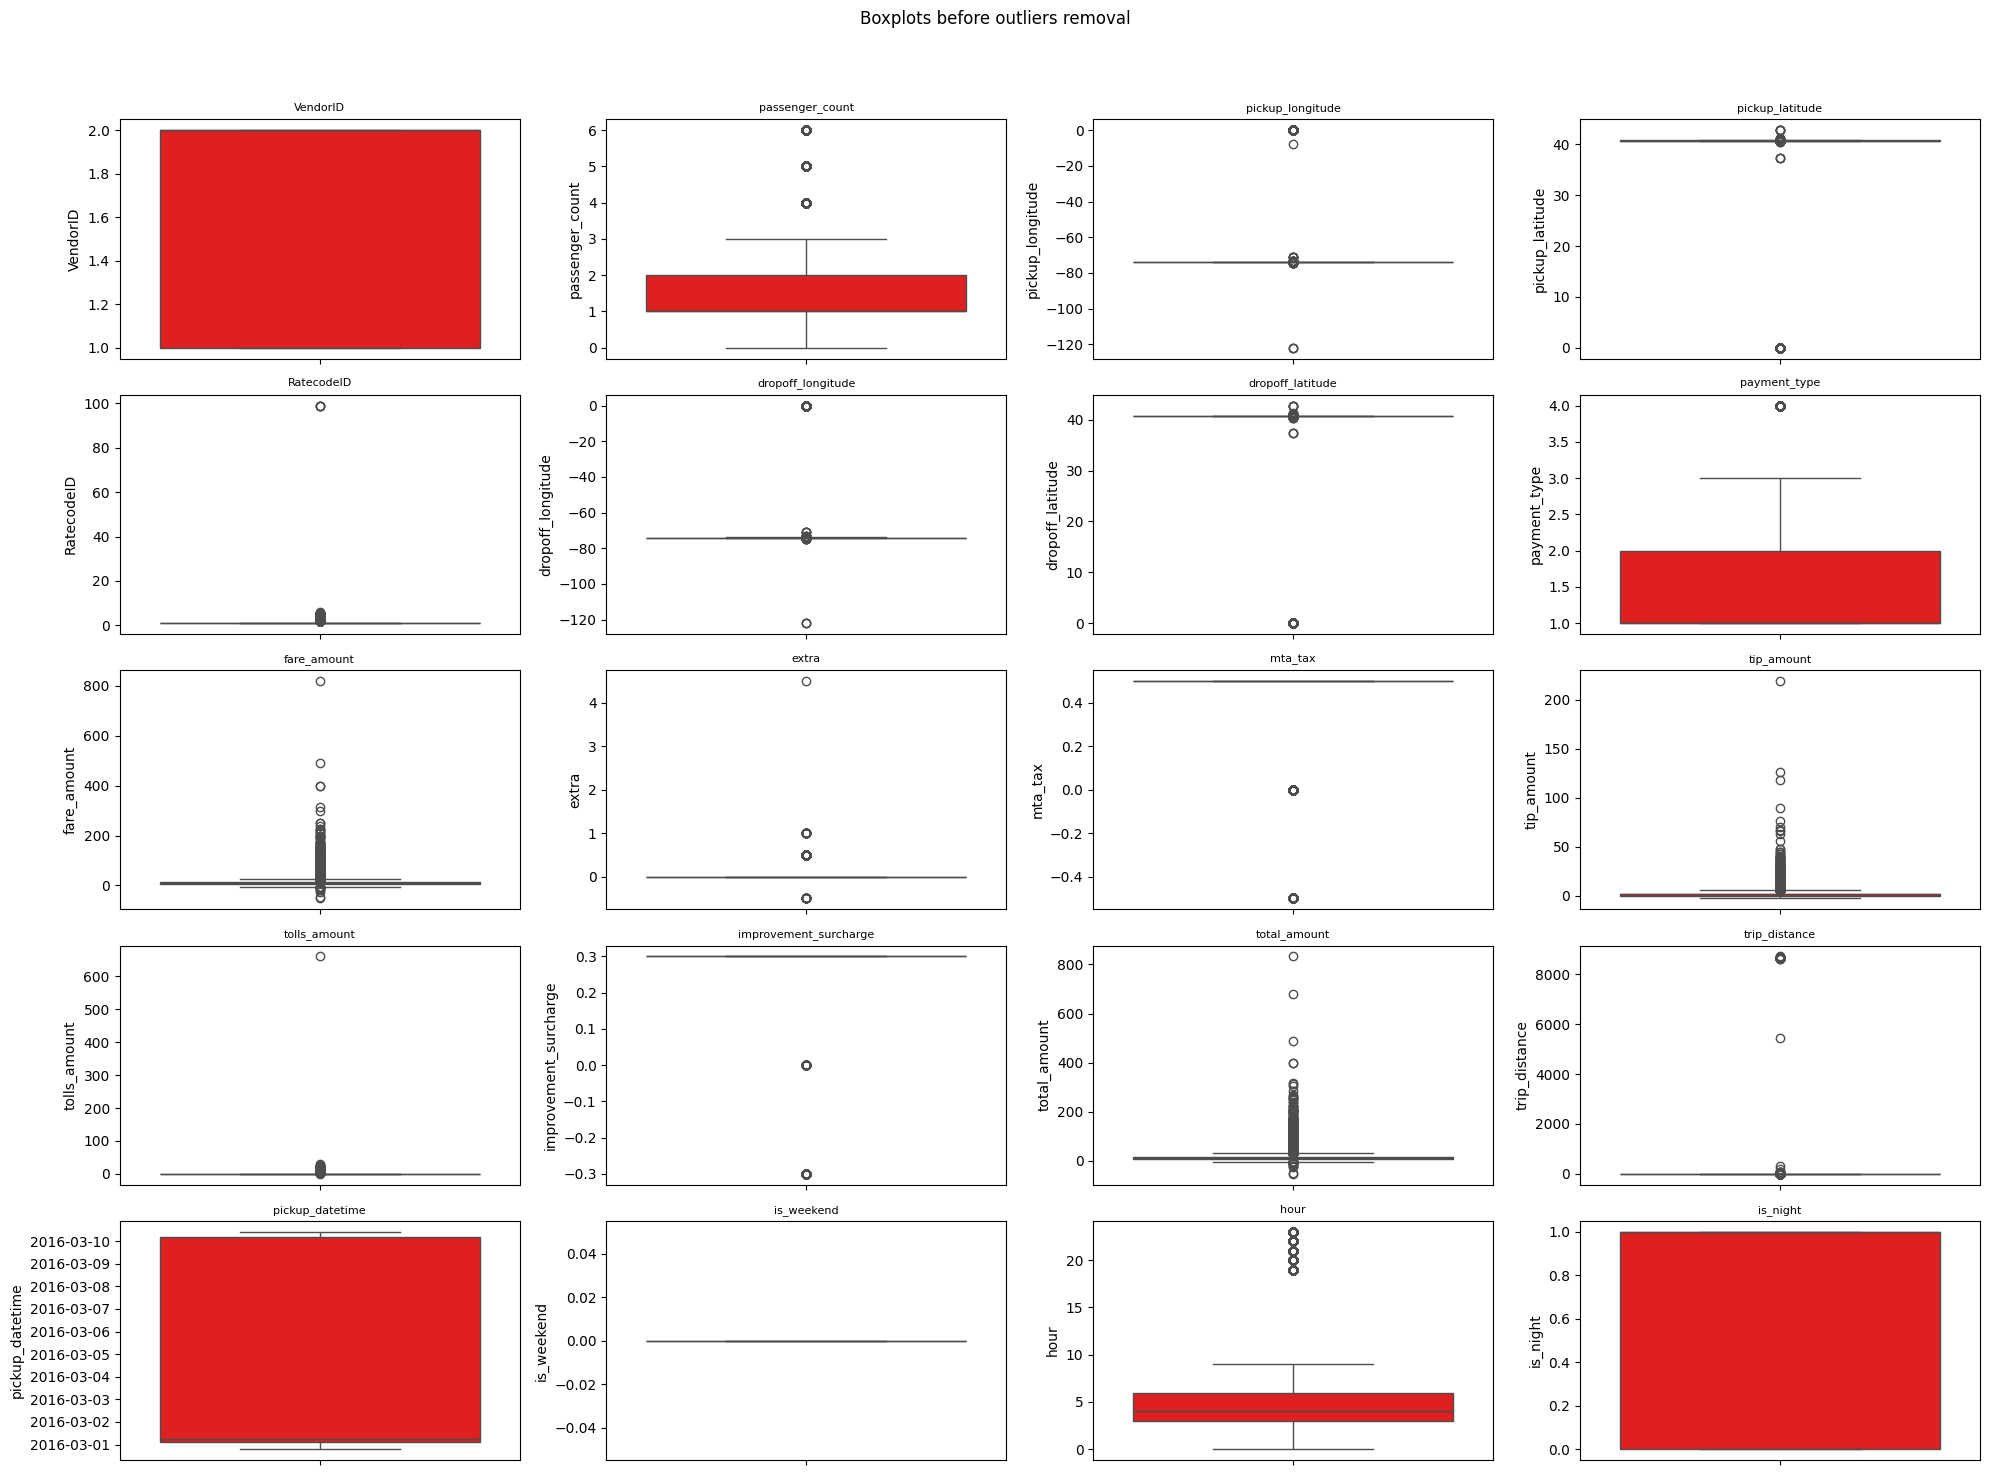

In [17]:
plt.figure(figsize=(20, 15))
plt.suptitle('Boxplots before outliers removal')

for i in range(len(numerical_cols)):
    plt.subplot(5, 4, i+1)  
    sns.boxplot(y=df[numerical_cols[i]], color='red')
    plt.title(numerical_cols[i], fontsize=8)

plt.tight_layout(rect=[0, 0, 1, 0.95])  
plt.show()


IQR METHOD 

In [18]:
# Ensure only numeric columns
numerical_cols = df.select_dtypes(include=['int64','float64']).columns

for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])


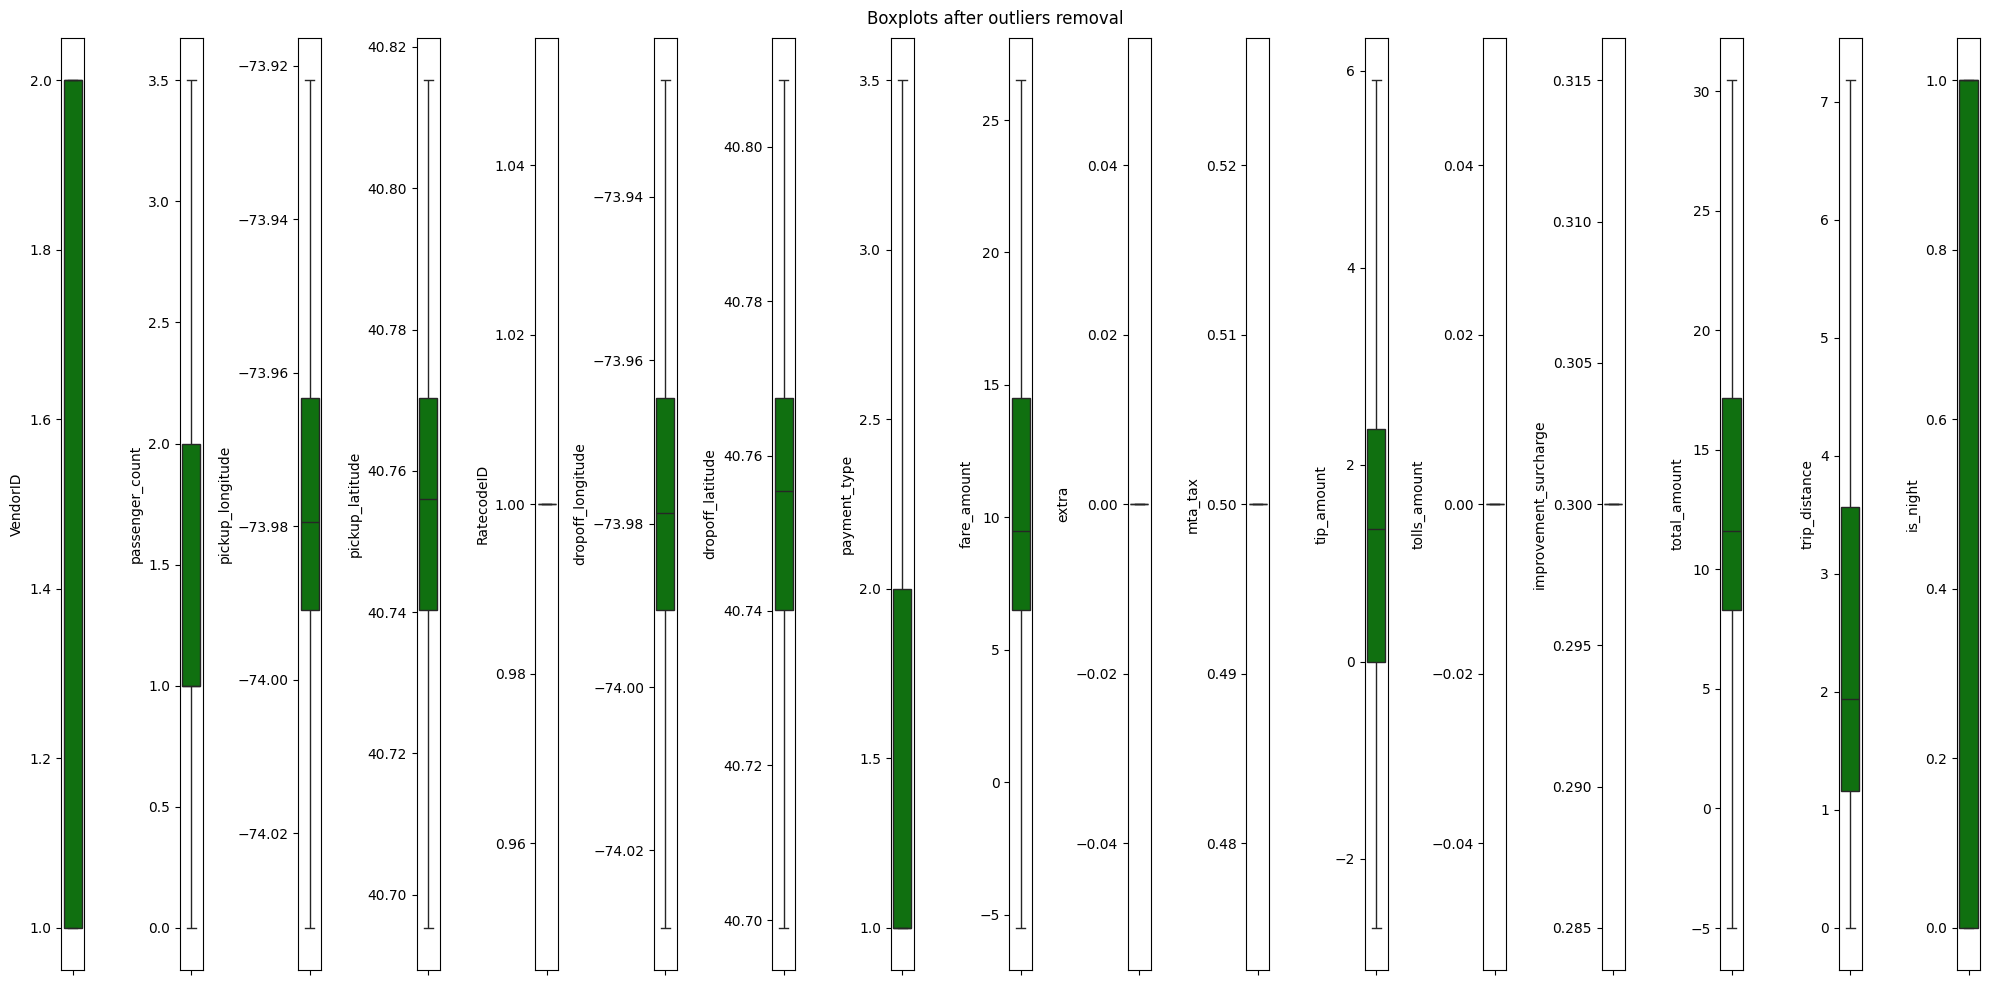

In [19]:
plt.figure(figsize=(20, 10))
plt.suptitle('Boxplots after outliers removal')
for i in range(0, len(numerical_cols)):
    plt.subplot(1, 17, i+1)
    sns.boxplot(y=df[numerical_cols[i]],color='green',)
    plt.tight_layout()

EXPLORATORY DATA ANALYSIS

UNIVARIATE ANALYSIS

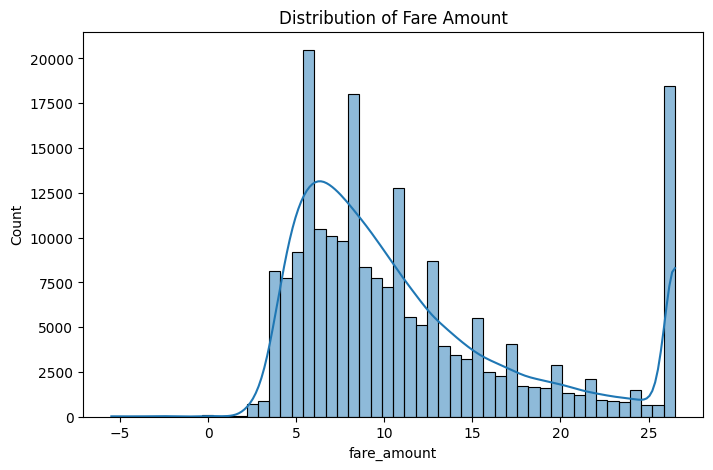

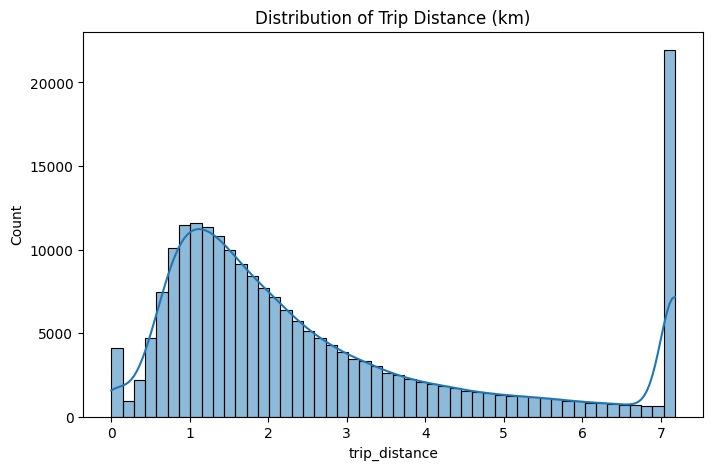

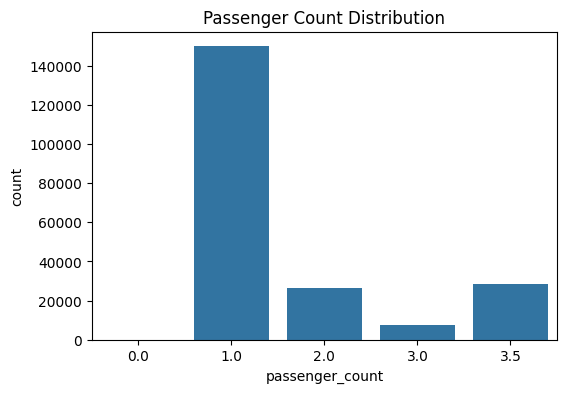

In [20]:
# Fare Distribution
plt.figure(figsize=(8,5))
sns.histplot(df['fare_amount'], bins=50, kde=True)
plt.title("Distribution of Fare Amount")
plt.show()

# Trip Distance Distribution
plt.figure(figsize=(8,5))
sns.histplot(df['trip_distance'], bins=50, kde=True)
plt.title("Distribution of Trip Distance (km)")
plt.show()

# Passenger Count Distribution
plt.figure(figsize=(6,4))
sns.countplot(x='passenger_count', data=df)
plt.title("Passenger Count Distribution")
plt.show()


BIVARIATE ANALYSIS

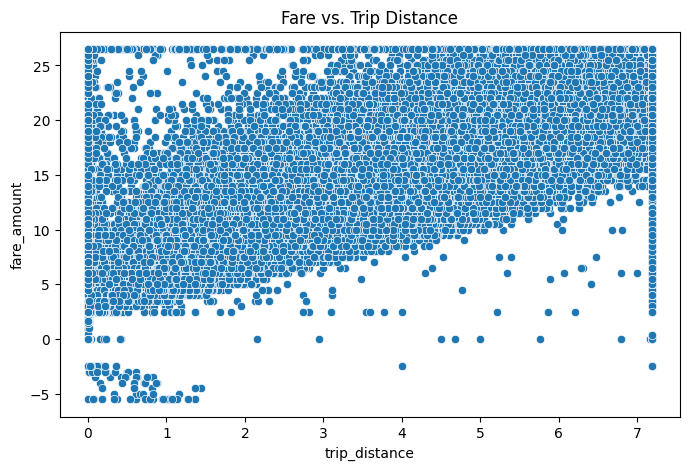

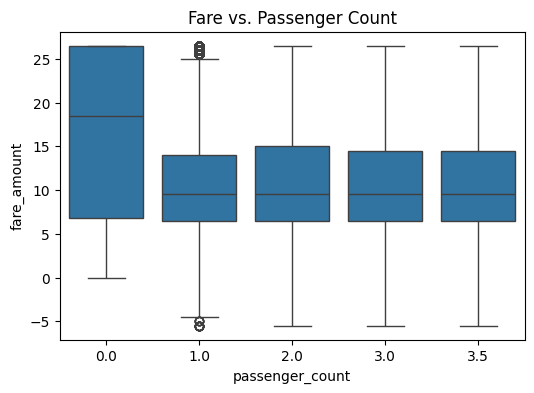

In [21]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='trip_distance', y='fare_amount', data=df)
plt.title("Fare vs. Trip Distance")
plt.show()

plt.figure(figsize=(6,4))
sns.boxplot(x='passenger_count', y='fare_amount', data=df)
plt.title("Fare vs. Passenger Count")
plt.show()




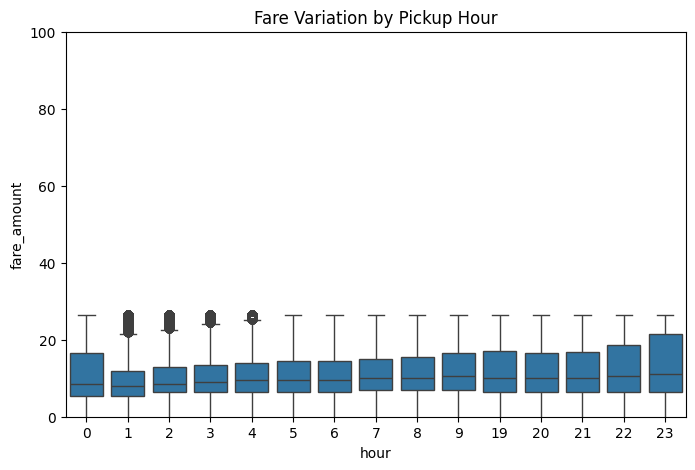

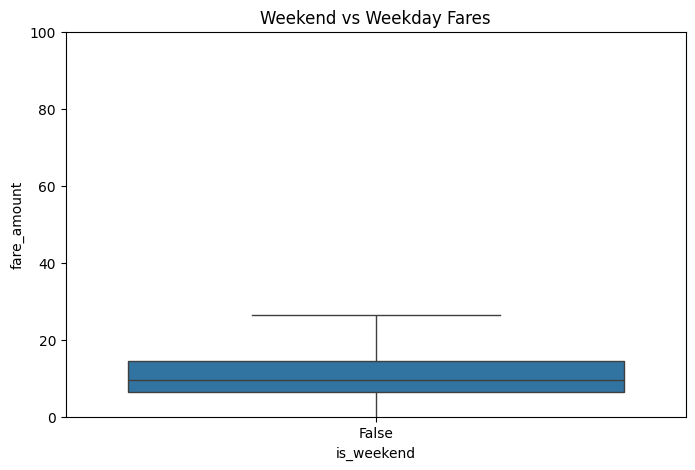

In [22]:
# Fare by hour
df['hour'] = df['pickup_datetime'].dt.hour

plt.figure(figsize=(8,5))
sns.boxplot(x='hour', y='fare_amount', data=df)
plt.title("Fare Variation by Pickup Hour")
plt.ylim(0, 100)
plt.show()

# Fare by weekday/weekend
plt.figure(figsize=(8,5))
sns.boxplot(x='is_weekend', y='fare_amount', data=df)
plt.title("Weekend vs Weekday Fares")
plt.ylim(0, 100)
plt.show()


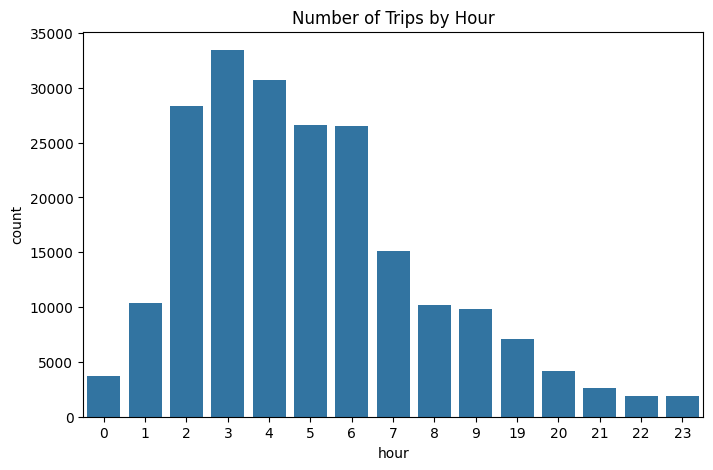

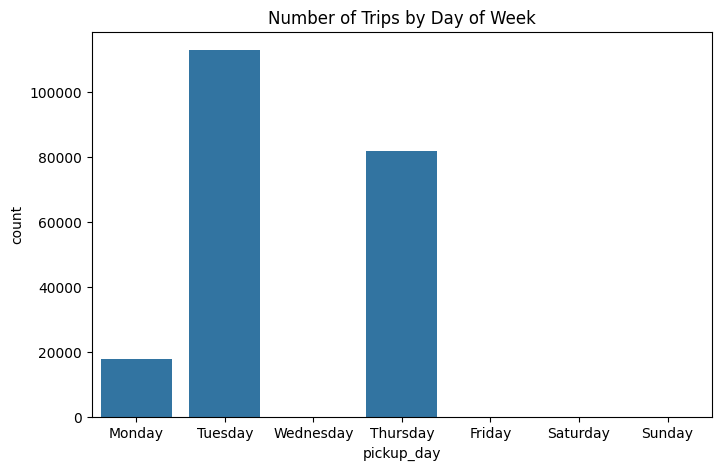

In [23]:
# Trips by Hour
plt.figure(figsize=(8,5))
sns.countplot(x='hour', data=df)
plt.title("Number of Trips by Hour")
plt.show()

# Trips by Day
plt.figure(figsize=(8,5))
sns.countplot(x='pickup_day', data=df, order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
plt.title("Number of Trips by Day of Week")
plt.show()


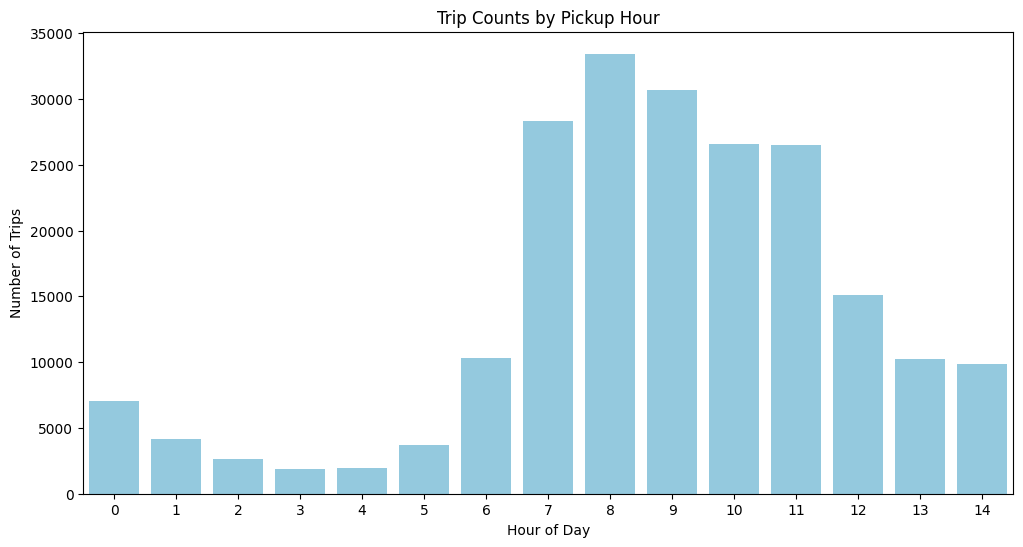

In [24]:
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'], errors='coerce')

# Extract hour and day name
df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour
df['pickup_day'] = df['tpep_pickup_datetime'].dt.day_name()

# Plot trip counts by pickup hour
plt.figure(figsize=(12,6))
sns.countplot(x='pickup_hour', data=df, color='skyblue')
plt.title("Trip Counts by Pickup Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Trips")
plt.show()

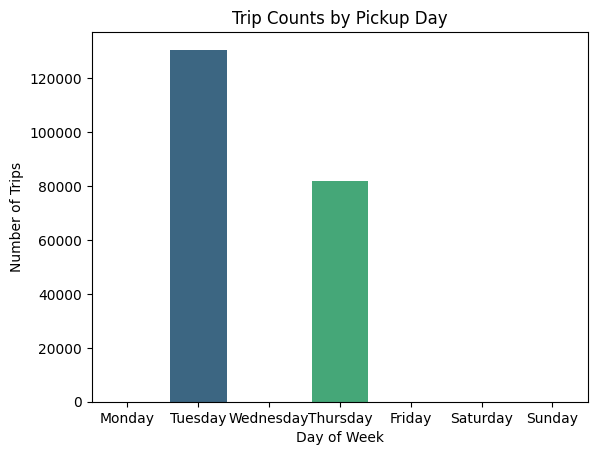

In [25]:
order = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]

sns.countplot(
    x="pickup_day",
    data=df,
    order=order,
    hue="pickup_day",       # assign hue same as x
    palette="viridis",
    legend=False            # hide redundant legend
)
plt.title("Trip Counts by Pickup Day")
plt.xlabel("Day of Week")
plt.ylabel("Number of Trips")
plt.show()


<Axes: xlabel='is_night', ylabel='fare_amount'>

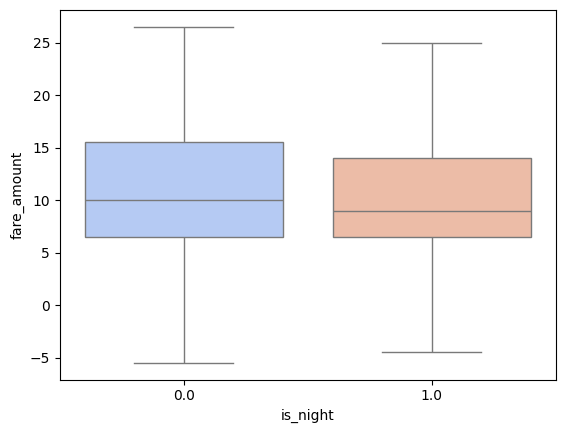

In [26]:
sns.boxplot(
    x='is_night',
    y='fare_amount',
    data=df,
    hue='is_night',          # assign hue
    palette="coolwarm",
    showfliers=False,
    legend=False             # avoid duplicate legend
)


<Axes: xlabel='is_weekend', ylabel='fare_amount'>

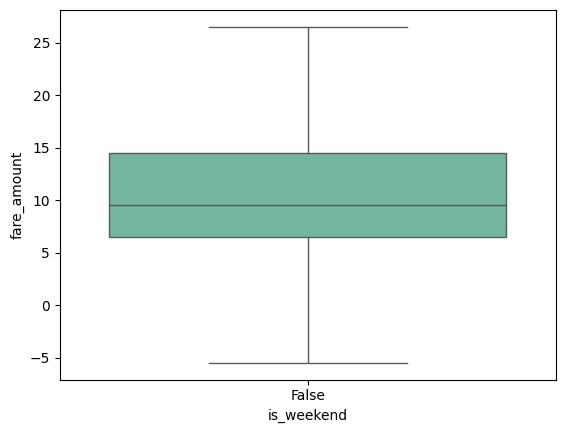

In [27]:
# Create weekend flag
sns.boxplot(
    x='is_weekend',
    y='fare_amount',
    data=df,
    hue='is_weekend',       # map palette to same variable
    palette="Set2",
    showfliers=False,
    legend=False            # avoids duplicate legend
)



TO CHECK SKEWNESS

In [28]:
numeric_cols = df.select_dtypes(include=['int64','float64']).columns

# Compute skewness
skewness = df[numeric_cols].skew()
print(skewness)

VendorID                -0.916729
passenger_count          1.395344
pickup_longitude         0.754693
pickup_latitude         -0.394107
RatecodeID               0.000000
dropoff_longitude        0.576513
dropoff_latitude        -0.257587
payment_type             0.867560
fare_amount              1.067632
extra                    0.000000
mta_tax                  0.000000
tip_amount               1.068653
tolls_amount             0.000000
improvement_surcharge    0.000000
total_amount             1.024187
trip_distance            1.078316
is_night                -0.603459
dtype: float64


In [29]:
skewed_cols = skewness.index
skewed_cols

Index(['VendorID', 'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'RatecodeID', 'dropoff_longitude', 'dropoff_latitude', 'payment_type',
       'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
       'improvement_surcharge', 'total_amount', 'trip_distance', 'is_night'],
      dtype='object')

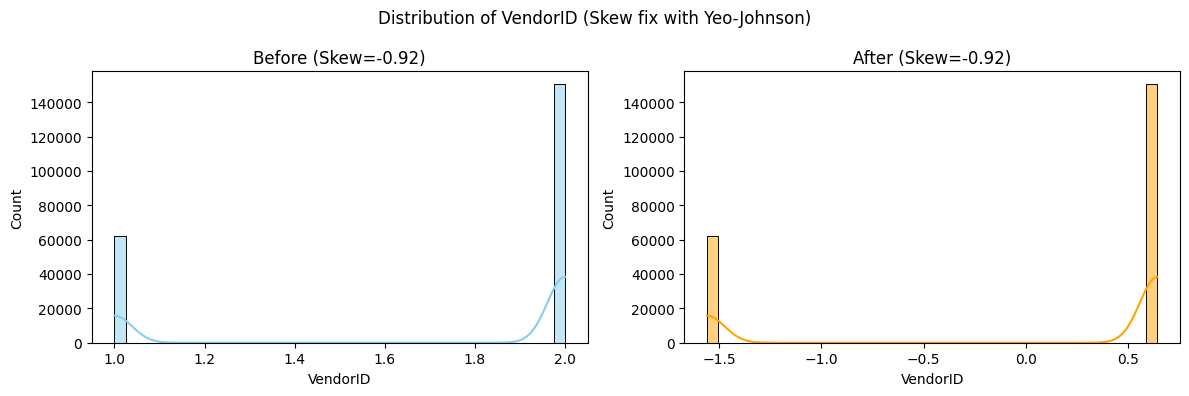

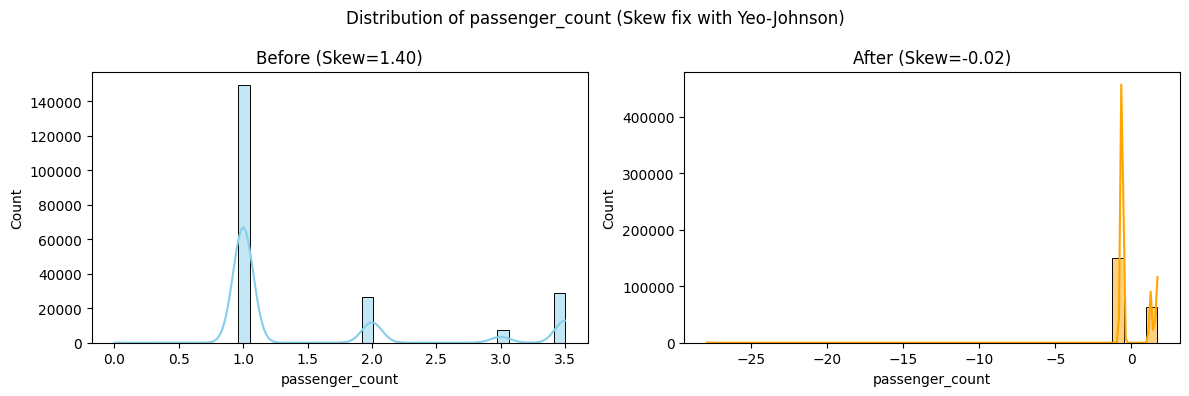

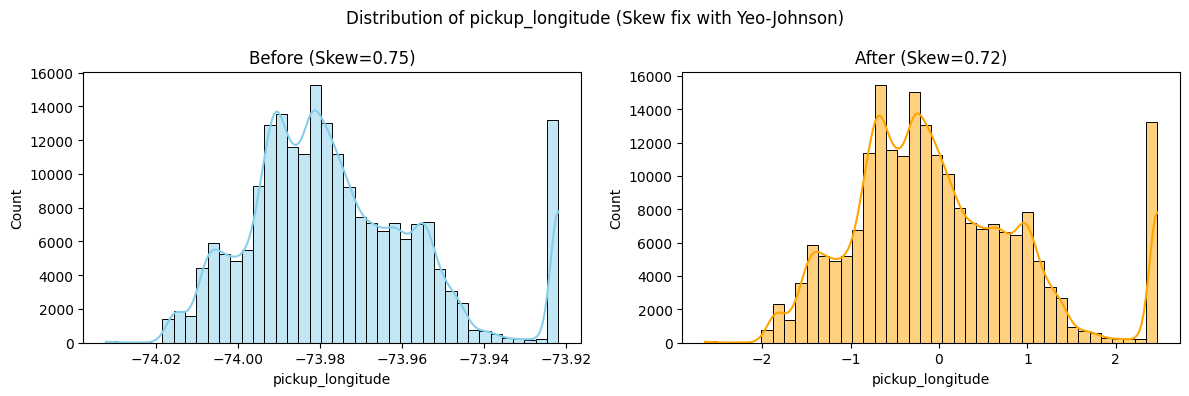

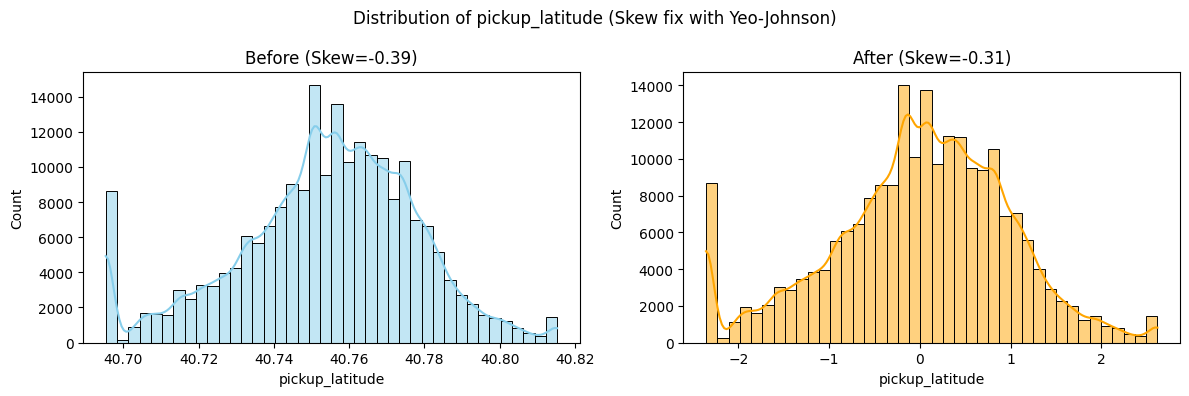

C:\Users\sakth\AppData\Local\Temp\ipykernel_13072\1095971112.py:25: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  axes[0].set_title(f"Before (Skew={skew(df_before[col].dropna()):.2f})")


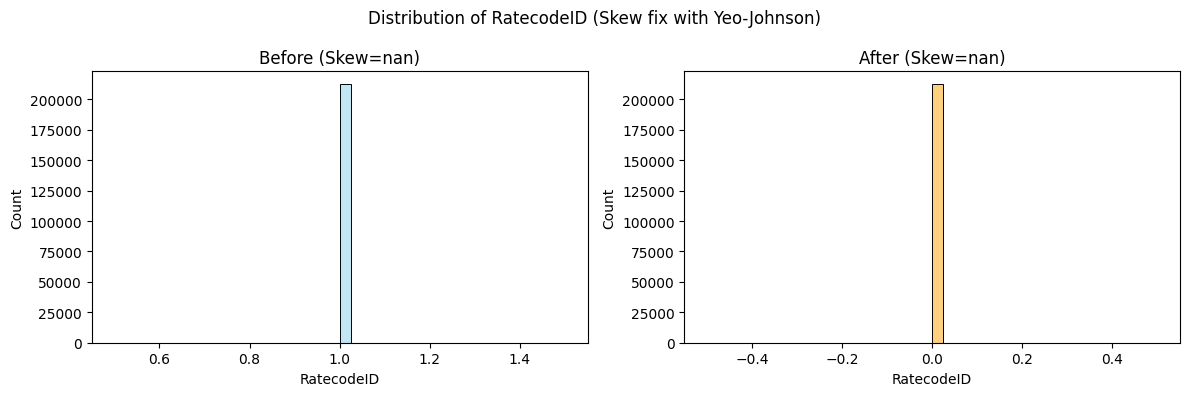

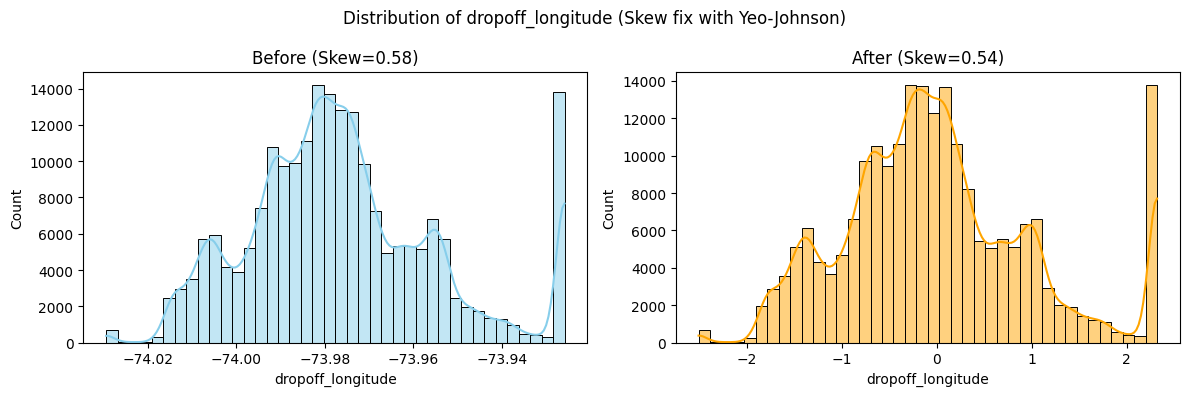

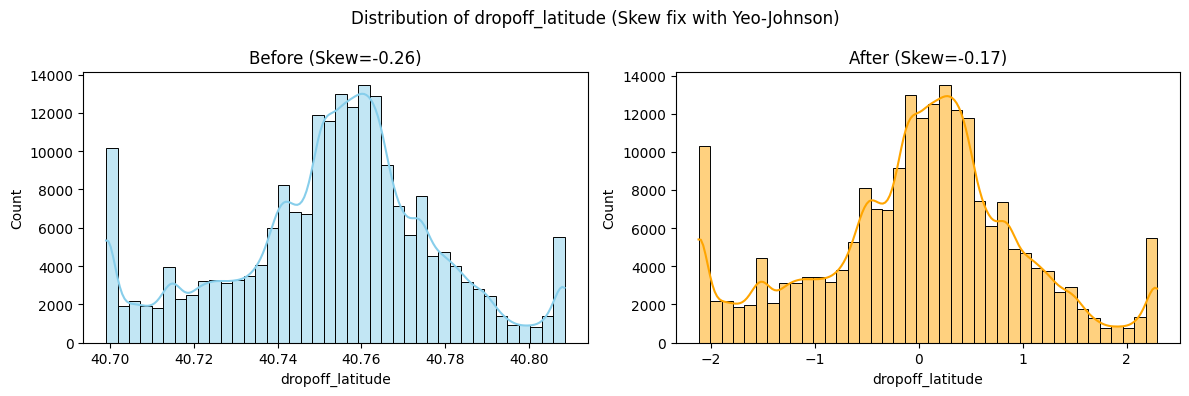

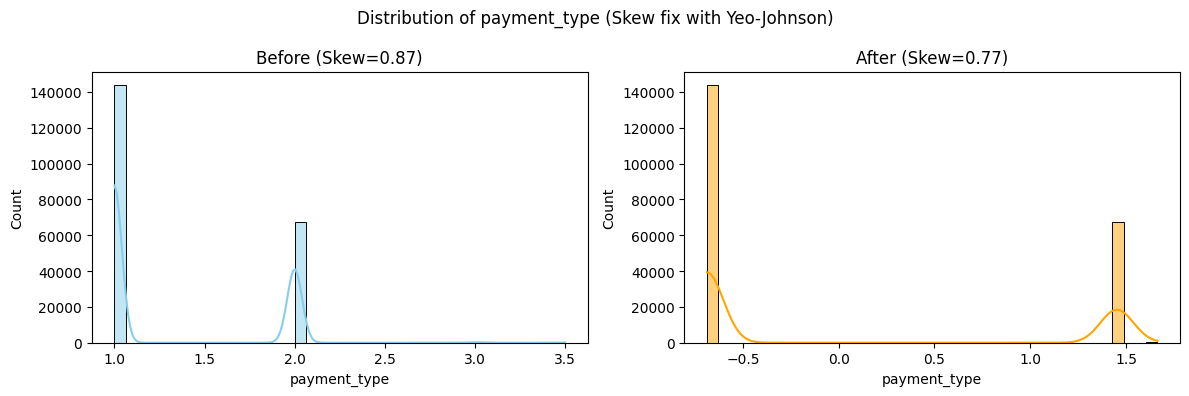

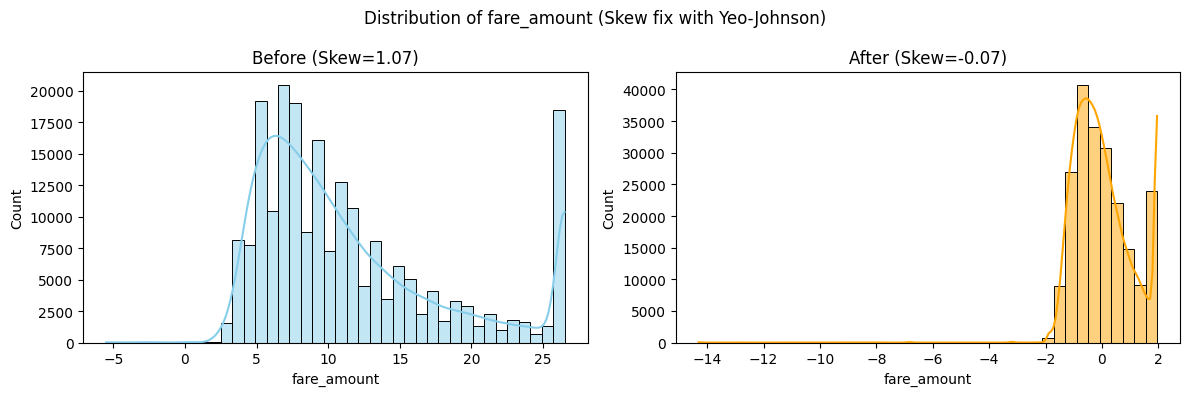

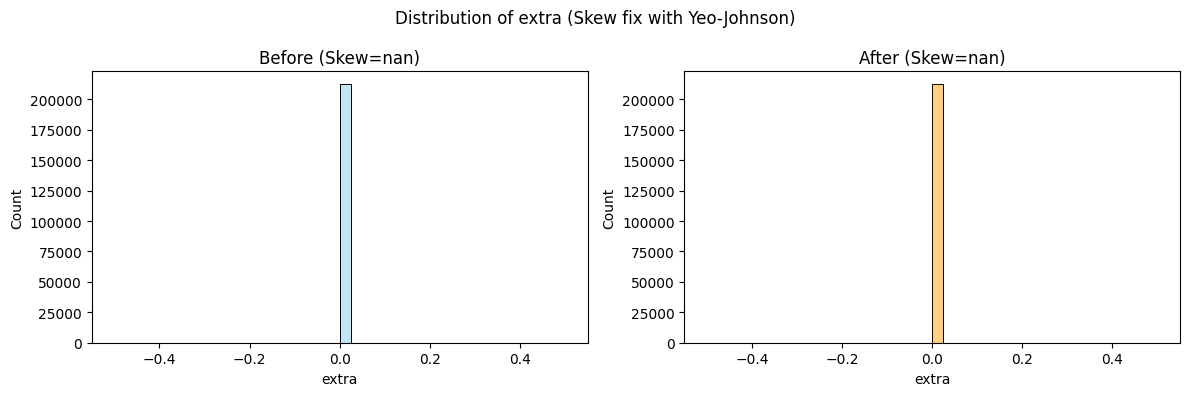

C:\Users\sakth\AppData\Local\Temp\ipykernel_13072\1095971112.py:25: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  axes[0].set_title(f"Before (Skew={skew(df_before[col].dropna()):.2f})")


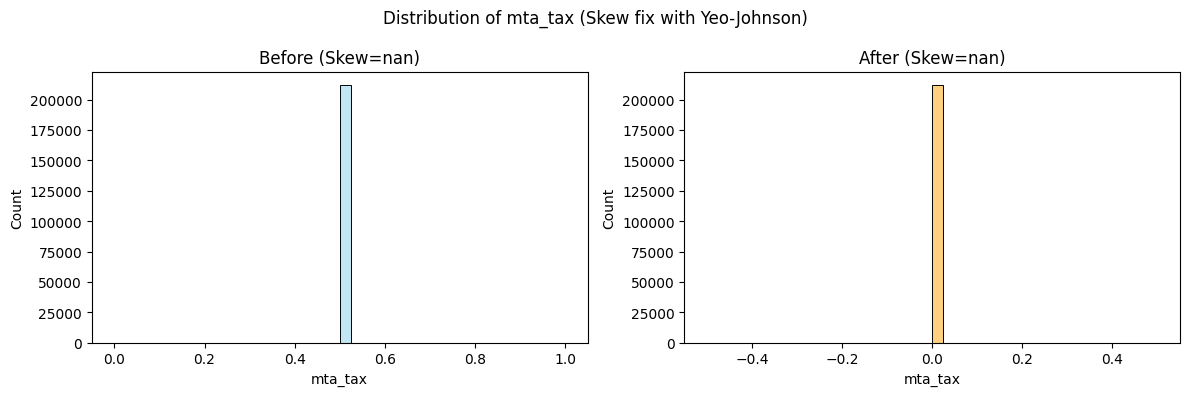

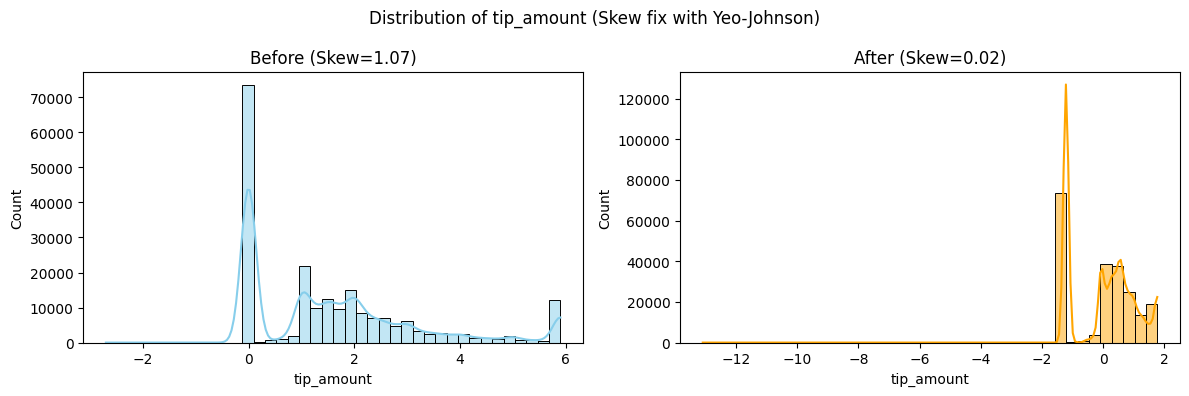

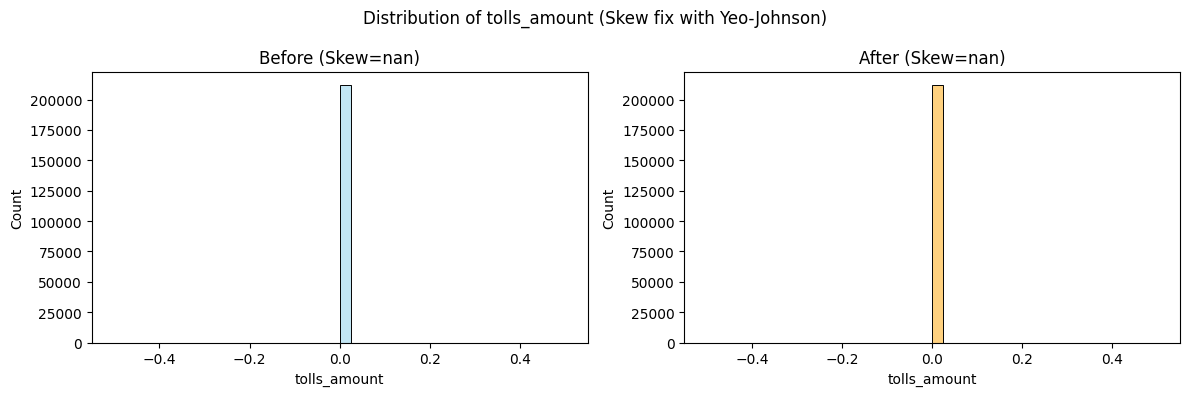

C:\Users\sakth\AppData\Local\Temp\ipykernel_13072\1095971112.py:25: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  axes[0].set_title(f"Before (Skew={skew(df_before[col].dropna()):.2f})")
C:\Users\sakth\AppData\Local\Temp\ipykernel_13072\1095971112.py:29: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  axes[1].set_title(f"After (Skew={skew(df[col].dropna()):.2f})")


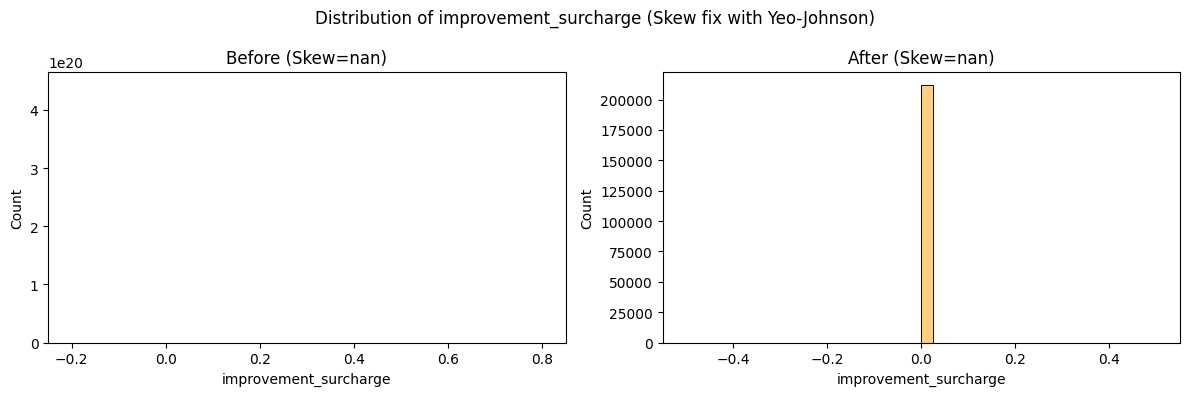

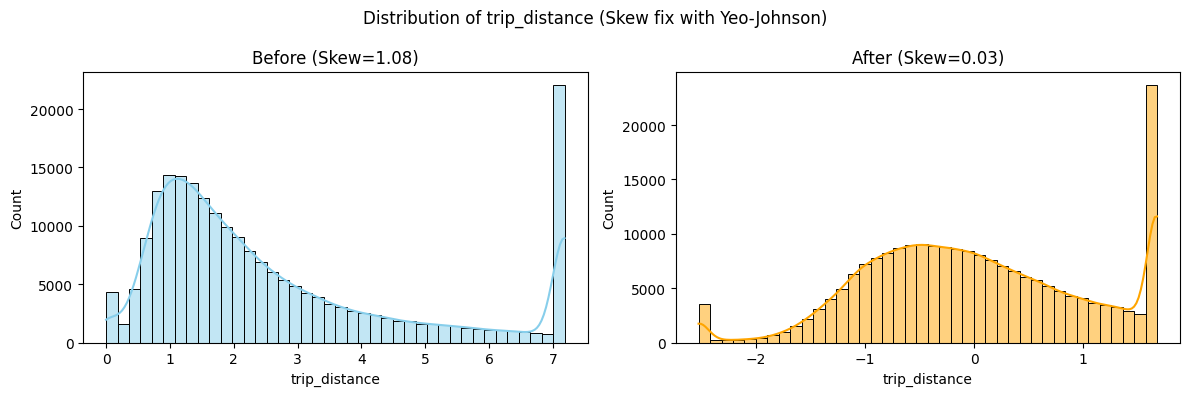

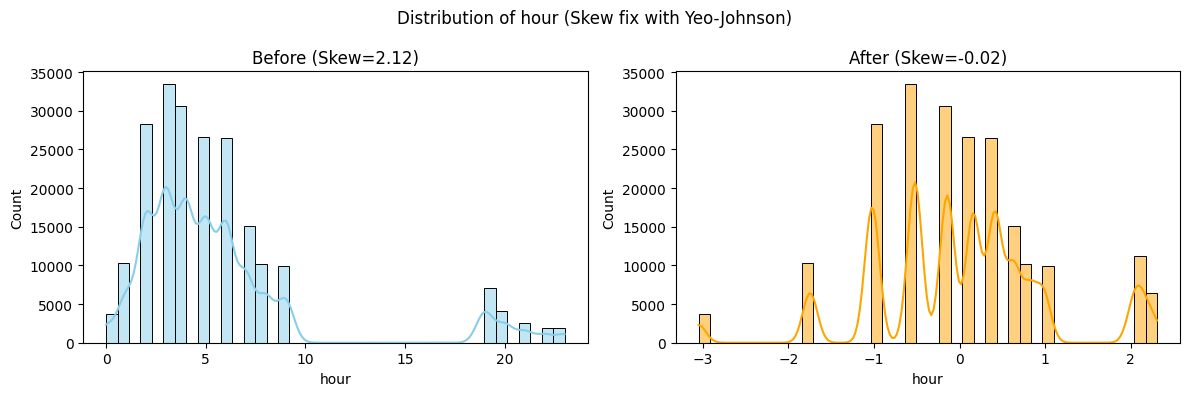

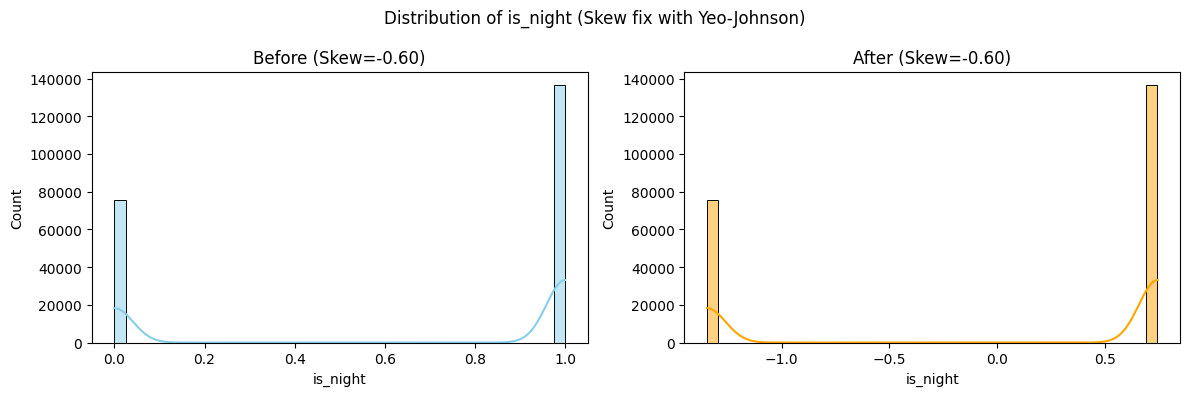

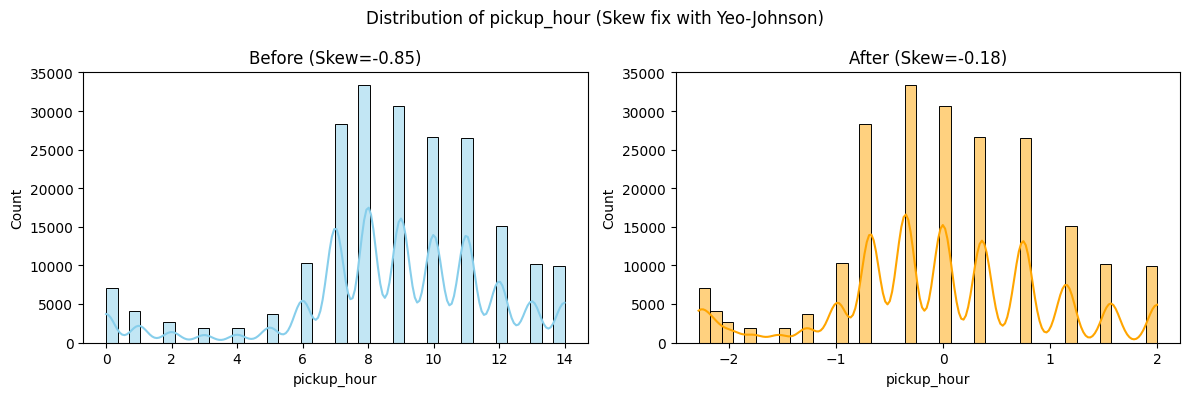

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PowerTransformer
from scipy.stats import skew

# 1. Select numeric columns (exclude target)
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
if 'total_amount' in numeric_cols:
    numeric_cols.remove('total_amount')

# 2. Copy original data for comparison
df_before = df[numeric_cols].copy()

# 3. Apply Yeo-Johnson Power Transformation
pt = PowerTransformer(method='yeo-johnson', standardize=True)
df[numeric_cols] = pt.fit_transform(df[numeric_cols])

# 4. Compare histograms before vs after
for col in numeric_cols:
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    fig.suptitle(f"Distribution of {col} (Skew fix with Yeo-Johnson)")

    # Before transformation
    sns.histplot(df_before[col].dropna(), kde=True, bins=40, ax=axes[0], color="skyblue")
    axes[0].set_title(f"Before (Skew={skew(df_before[col].dropna()):.2f})")

    # After transformation
    sns.histplot(df[col].dropna(), kde=True, bins=40, ax=axes[1], color="orange")
    axes[1].set_title(f"After (Skew={skew(df[col].dropna()):.2f})")

    plt.tight_layout()
    plt.show()


In [31]:
from sklearn.preprocessing import LabelEncoder

# 1. Identify categorical columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

print("Categorical columns:", categorical_cols)

# 2. Label Encode categorical features
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col].astype(str))  # convert to string to avoid errors

print("✅ Encoding done. All categorical variables converted to numeric.")


Categorical columns: ['tpep_dropoff_datetime', 'pickup_day', 'am_pm']
✅ Encoding done. All categorical variables converted to numeric.


DROP THE UNWANTED COLUMNS

In [32]:
df = df.drop(['fare_amount','extra', 'mta_tax', 'tip_amount', 'tolls_amount','improvement_surcharge'], axis=1)
df = df.drop(['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude'], axis=1)
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,RatecodeID,payment_type,total_amount,trip_distance,pickup_datetime,pickup_day,is_weekend,am_pm,hour,is_night,pickup_hour
0,-1.558404,2016-03-01,136,-0.629554,0.0,-0.687735,12.35,0.549907,2016-02-29 19:00:00-05:00,1,False,1,2.039127,-1.346256,-2.283545
1,-1.558404,2016-03-01,269,-0.629554,0.0,-0.687735,15.35,0.982179,2016-02-29 19:00:00-05:00,1,False,1,2.039127,-1.346256,-2.283545
2,0.641682,2016-03-01,1285,1.266102,0.0,-0.687735,30.45,1.675281,2016-02-29 19:00:00-05:00,1,False,1,2.039127,-1.346256,-2.283545
3,0.641682,2016-03-01,1,1.637767,0.0,-0.687735,30.45,1.675281,2016-02-29 19:00:00-05:00,1,False,1,2.039127,-1.346256,-2.283545
4,0.641682,2016-03-01,1,1.708650,0.0,-0.687735,30.45,1.675281,2016-02-29 19:00:00-05:00,1,False,1,2.039127,-1.346256,-2.283545


FEATURE SELECTION

CORRELATION ANALYSIS

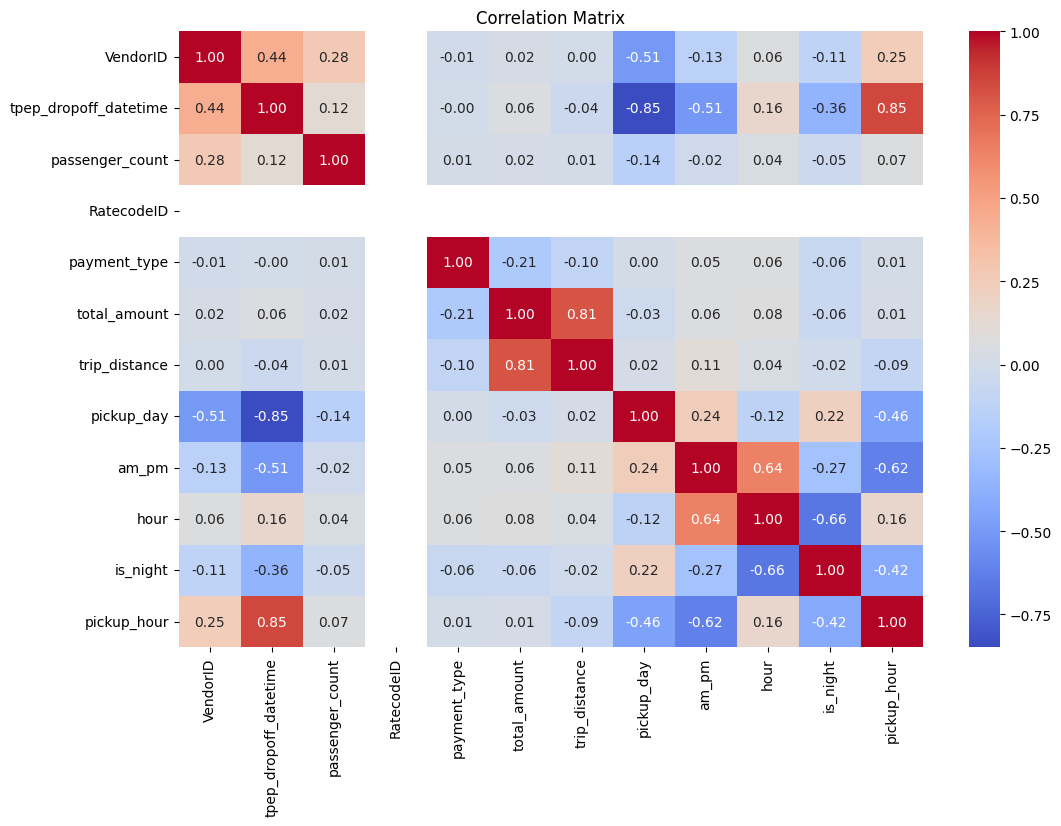

Features correlated with total_amount:
total_amount             1.000000
trip_distance            0.807081
hour                     0.076670
tpep_dropoff_datetime    0.057195
am_pm                    0.056761
VendorID                 0.024791
passenger_count          0.015472
pickup_hour              0.013989
pickup_day              -0.031850
is_night                -0.055639
payment_type            -0.207506
RatecodeID                    NaN
Name: total_amount, dtype: float64


In [33]:
# Select numeric features including target
numeric_cols = df.select_dtypes(include=['int64','float64']).columns

# Compute correlation matrix
corr = df[numeric_cols].corr()

# Plot heatmap
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

# Correlation with target
target_corr = corr['total_amount'].sort_values(ascending=False)
print("Features correlated with total_amount:")
print(target_corr)

RANDOM FOREST

✅ Model Comparison:
               Model        R²        MSE      RMSE       MAE
0  Linear Regression  0.704848  16.528502  4.065526  2.885660
1   Ridge Regression  0.704850  16.528379  4.065511  2.885658
2   Lasso Regression  0.704853  16.528219  4.065491  2.885575
3      Random Forest  0.847681   8.529843  2.920590  1.954039
4  Gradient Boosting  0.860297   7.823342  2.797024  1.866242

Top 15 Features - Random Forest


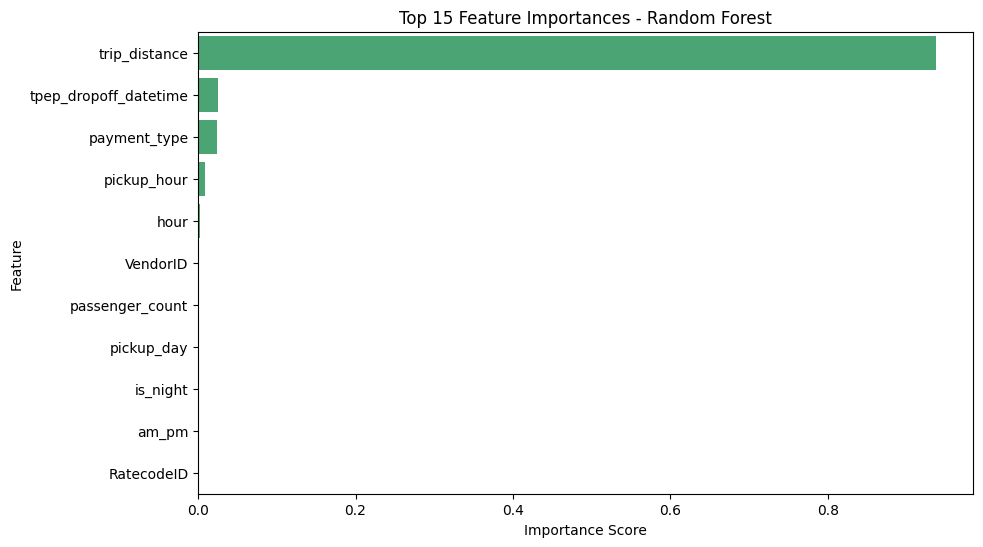


Top 15 Features - Gradient Boosting


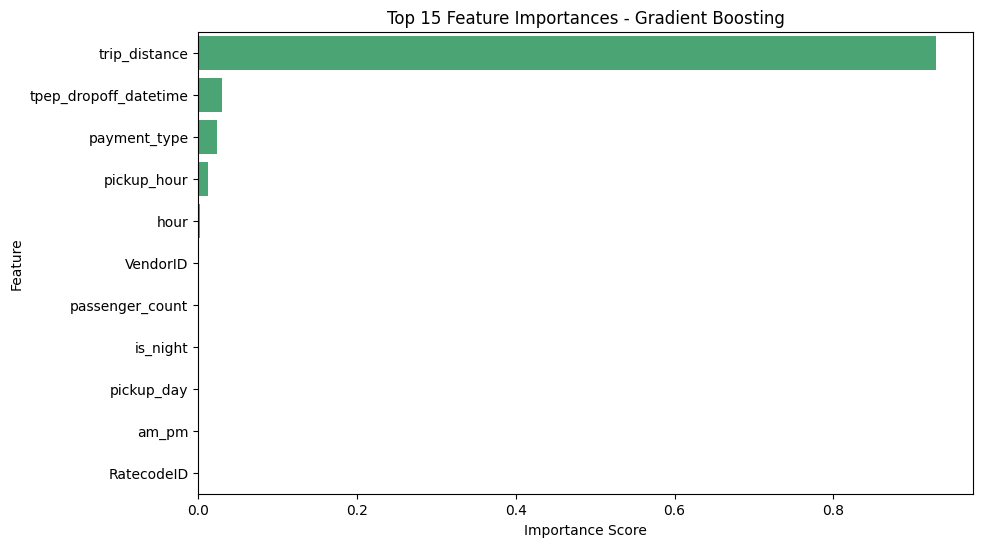

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error


df = df.fillna(df.median())

X = df.drop("total_amount", axis=1)
y = df["total_amount"]
X = X.select_dtypes(include=[np.number])  # numeric only

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.001, max_iter=10000),
    "Random Forest": RandomForestRegressor(n_estimators=200, max_depth=10, random_state=42, n_jobs=-1),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, max_depth=5, random_state=42)
}


results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)

    results.append({
        "Model": name,
        "R²": r2,
        "MSE": mse,
        "RMSE": rmse,
        "MAE": mae
    })

results_df = pd.DataFrame(results)
print("✅ Model Comparison:")
print(results_df)

for tree_model in ["Random Forest", "Gradient Boosting"]:
    print(f"\nTop 15 Features - {tree_model}")
    model = models[tree_model]
    importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)

    top_features = importances[:15].reset_index()
    top_features.columns = ['feature', 'importance']

    plt.figure(figsize=(10,6))
    sns.barplot(x='importance', y='feature', data=top_features, color='mediumseagreen')  # safe for Seaborn v0.14+
    plt.title(f"Top 15 Feature Importances - {tree_model}")
    plt.xlabel("Importance Score")
    plt.ylabel("Feature")
    plt.show()

Fitting 5 folds for each of 32 candidates, totalling 160 fits
✅ Best Parameters: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}

✅ Tuned Random Forest Performance:
R²: 0.8569
MSE: 8.01
RMSE: 2.83
MAE: 1.89


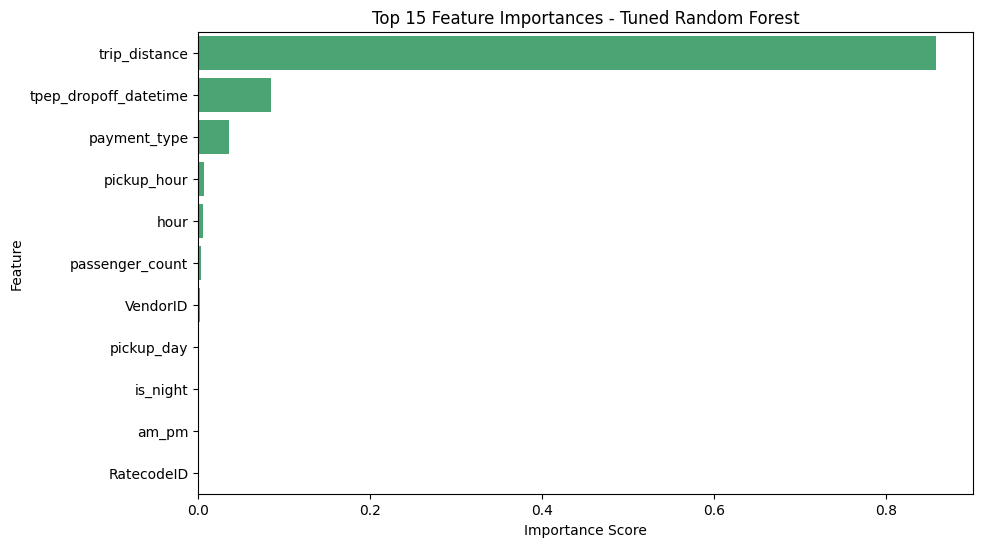

In [35]:


from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


rf = RandomForestRegressor(random_state=42, n_jobs=-1)

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']  # 'auto' is deprecated in sklearn 1.2+
}


grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,
    scoring='r2',
    verbose=2
)

grid_search.fit(X_train, y_train)


print("✅ Best Parameters:", grid_search.best_params_)
best_rf = grid_search.best_estimator_


y_pred = best_rf.predict(X_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

print("\n✅ Tuned Random Forest Performance:")
print(f"R²: {r2:.4f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")


importances = pd.Series(best_rf.feature_importances_, index=X.columns).sort_values(ascending=False)

top_features = importances[:15].reset_index()
top_features.columns = ['feature', 'importance']

plt.figure(figsize=(10,6))
sns.barplot(x='importance', y='feature', data=top_features, color='mediumseagreen')
plt.title("Top 15 Feature Importances - Tuned Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()



In [36]:

results = []

models = {
    "Linear Regression": LinearRegression(),
    "Ridge": Ridge(alpha=1.0, random_state=42),
    "Lasso": Lasso(alpha=0.01, random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=200, random_state=42, n_jobs=-1),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=200, random_state=42)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)

    results.append((name, r2, mse, rmse, mae))

# Convert to DataFrame for comparison
results_df = pd.DataFrame(results, columns=["Model", "R²", "MSE", "RMSE", "MAE"])
print("\n📊 Model Comparison:\n", results_df)


best_model_name = results_df.sort_values(by="R²", ascending=False).iloc[0]["Model"]
print(f"\n✅ Best Model Based on R²: {best_model_name}")

best_model = models[best_model_name]
best_model.fit(X_train, y_train)  # retrain on full training set


import joblib

joblib.dump(best_model, f"{best_model_name.replace(' ', '_').lower()}_model.pkl")
print(f"📁 Model saved as {best_model_name.replace(' ', '_').lower()}_model.pkl")


loaded_model = joblib.load(f"{best_model_name.replace(' ', '_').lower()}_model.pkl")
sample_pred = loaded_model.predict(X_test[:5])
print("\n🔮 Sample Predictions from loaded model:", sample_pred)


c:\Users\sakth\OneDrive\Desktop\PythonProjects\myvirtual_venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.365e+06, tolerance: 9.430e+02
  model = cd_fast.enet_coordinate_descent(



📊 Model Comparison:
                Model        R²        MSE      RMSE       MAE
0  Linear Regression  0.704848  16.528502  4.065526  2.885660
1              Ridge  0.704850  16.528379  4.065511  2.885658
2              Lasso  0.703741  16.590505  4.073144  2.891880
3      Random Forest  0.834507   9.267596  3.044273  2.005474
4  Gradient Boosting  0.851856   8.296064  2.880289  1.930557

✅ Best Model Based on R²: Gradient Boosting
📁 Model saved as gradient_boosting_model.pkl

🔮 Sample Predictions from loaded model: [13.70380337  5.56692311  8.61871277 11.59666786  7.77501936]
